<a href="https://colab.research.google.com/github/danushgopinath/Water-Analysis/blob/main/FinalWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/gdrive/My Drive/Water/korattur-original.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("BAGGING USING DECISION TREES")
print(f'Accuracy: {accuracy*100}%')
cm_dt = confusion_matrix(y_test, y_pred)

BAGGING USING DECISION TREES
Accuracy: 100.0%


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

bagging = BaggingClassifier(SVC(kernel='linear'), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("BAGGING USING SVC")
print(f'Accuracy: {accuracy*100}%')
cm_svc = confusion_matrix(y_test, y_pred)

BAGGING USING SVC
Accuracy: 98.4313725490196%


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

base_estimator = LogisticRegression(random_state=42)
boosting = AdaBoostClassifier(n_estimators=10, random_state=42)
boosting.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = boosting.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("BOOSTING USING LOGISTIC REGRESSION")
print(f'Accuracy: {accuracy*100}%')
cm_log = confusion_matrix(y_test, y_pred)

BOOSTING USING LOGISTIC REGRESSION
Accuracy: 95.29411764705881%


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier

selector = SelectKBest(score_func=f_classif, k=5)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

X_train = np.column_stack((X_train, X_train[:, 1] * X_train[:, 2]))
X_test = np.column_stack((X_test, X_test[:, 1] * X_test[:, 2]))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("USING KNN")
print(f'Accuracy: {accuracy*100}%')
cm_knn = confusion_matrix(y_test, y_pred)

USING KNN
Accuracy: 91.56862745098039%


In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 5,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

y_pred = model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)
print("USING XGBOOST")
print(f'Accuracy: {accuracy*100}%')
cm_xgb = confusion_matrix(y_test, y_pred)

USING XGBOOST
Accuracy: 100.0%


In [ ]:
print(cm_dt)
print(cm_svc)
print(cm_log)
print(cm_knn)
print(cm_xgb)

[[ 12   0   0   0   0]
 [  0  36   0   0   0]
 [  0   0  53   0   0]
 [  0   0   0 770   0]
 [  0   0   0   0 149]]
[[ 12   0   0   0   0]
 [  1  31   0   2   2]
 [  1   1  49   2   0]
 [  0   0   0 770   0]
 [  1   0   5   1 142]]
[[  0   0   0   0  12]
 [  0   0   0   0  36]
 [  0   0  53   0   0]
 [  0   0   0 770   0]
 [  0   0   0   0 149]]
[[  6   3   0   2   1]
 [  0  23   2   6   5]
 [  1   3  38   7   4]
 [  2   1   4 753  10]
 [  8   3   7  17 114]]
[[ 12   0   0   0   0]
 [  0  36   0   0   0]
 [  0   0  53   0   0]
 [  0   0   0 770   0]
 [  0   0   0   0 149]]


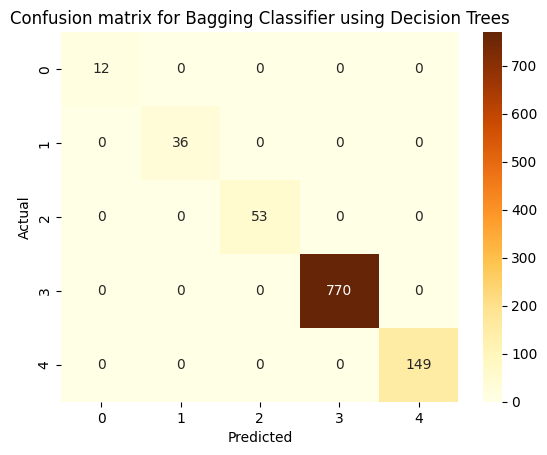

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_dt, annot=True, cmap='YlOrBr', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Bagging Classifier using Decision Trees')
plt.show()

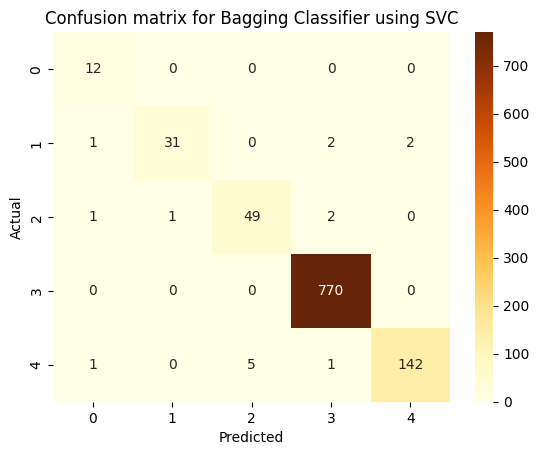

In [ ]:
sns.heatmap(cm_svc, annot=True, cmap='YlOrBr', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Bagging Classifier using SVC')
plt.show()

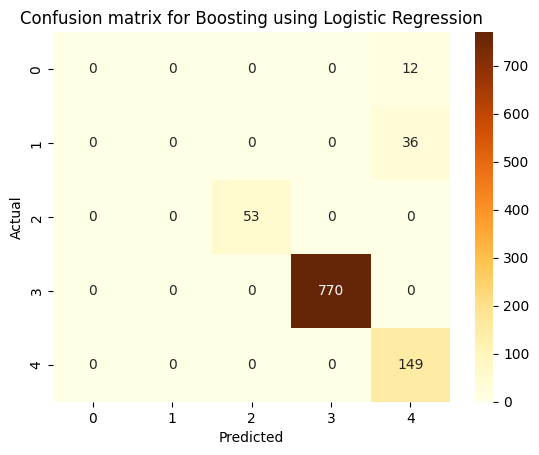

In [ ]:
sns.heatmap(cm_log, annot=True, cmap='YlOrBr', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Boosting using Logistic Regression')
plt.show()

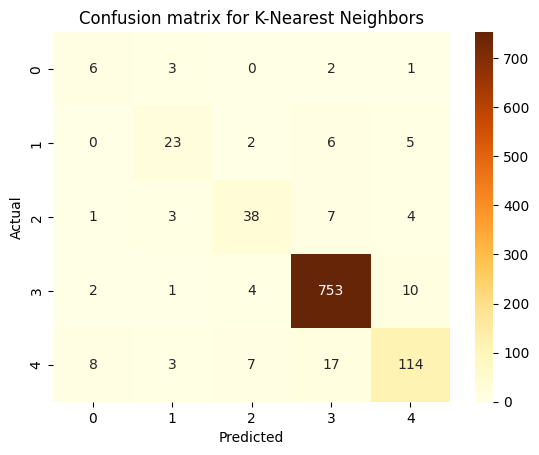

In [ ]:
sns.heatmap(cm_knn, annot=True, cmap='YlOrBr', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for K-Nearest Neighbors')
plt.show()

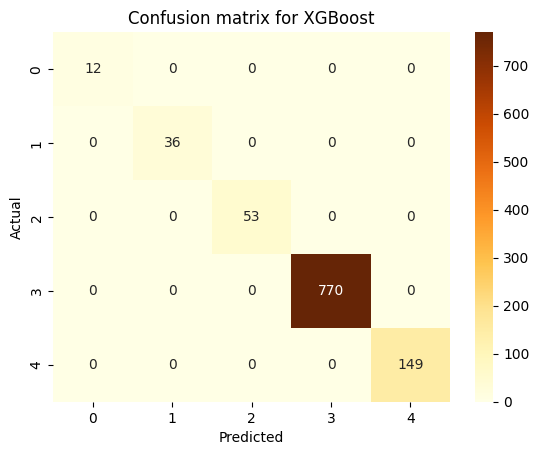

In [ ]:
sns.heatmap(cm_xgb, annot=True, cmap='YlOrBr', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for XGBoost')
plt.show()

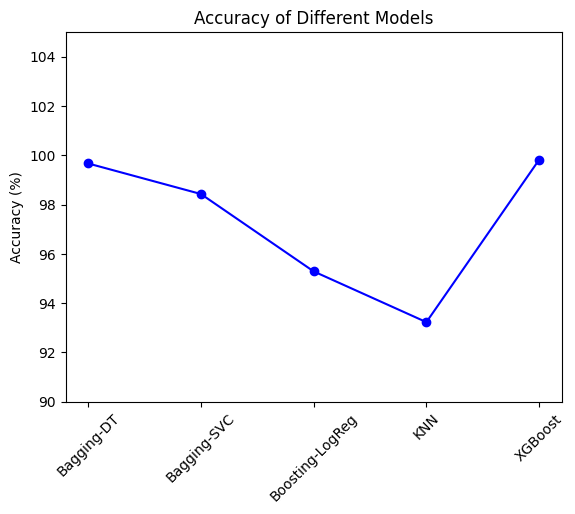

In [ ]:
import matplotlib.pyplot as plt

models = ['Bagging-DT', 'Bagging-SVC', 'Boosting-LogReg', 'KNN', 'XGBoost']
accuracies = [99.67, 98.43, 95.29, 93.23, 99.82]

plt.plot(models, accuracies, color='blue', marker='o')
plt.xticks(rotation=45)
plt.ylim([90, 105])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


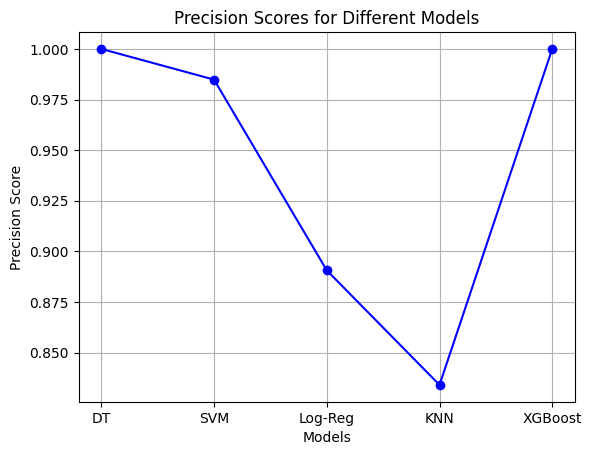

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Load dataset
dataset = pd.read_csv('/content/gdrive/My Drive/Water/korattur-original.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models and get precision scores
models = [
    BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, random_state=42),
    BaggingClassifier(SVC(kernel='linear'), n_estimators=10, random_state=42),
    AdaBoostClassifier(LogisticRegression(random_state=42), n_estimators=10, random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    xgb.XGBClassifier(objective='multi:softmax', num_class=5, max_depth=5, learning_rate=0.1,
                      subsample=0.8, colsample_bytree=0.8, seed=42)
]

model_names = [
    'DT',
    'SVM',
    'Log-Reg',
    'KNN',
    'XGBoost'
]

precision_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_scores.append(precision)

# Plot line chart
plt.plot(model_names, precision_scores, color='blue', marker='o')
plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.title('Precision Scores for Different Models')
plt.grid(True)
plt.show()


In [ ]:
import xgboost as xgb
import time

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 5,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_rounds = 100

start_time = time.time()

model = xgb.train(params, dtrain, num_rounds)

end_time = time.time()

y_pred = model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)
print("USING XGBOOST")
print(f'Accuracy: {accuracy*100}%')
x=end_time-start_time
print(x*1000)
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


USING XGBOOST
Accuracy: 100.0%
1038.1314754486084
Execution time: 1.04 seconds


In [ ]:
import time
start_time = time.time()

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier

selector = SelectKBest(score_func=f_classif, k=5)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

X_train = np.column_stack((X_train, X_train[:, 1] * X_train[:, 2]))
X_test = np.column_stack((X_test, X_test[:, 1] * X_test[:, 2]))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("USING KNN")
print(f'Accuracy: {accuracy*100}%')

end_time = time.time()
x=end_time-start_time
print(x*1000)
print(f"Execution time for KNN: {end_time - start_time} seconds")


USING KNN
Accuracy: 91.56862745098039%
32.14216232299805
Execution time for KNN: 0.03214216232299805 seconds


In [ ]:
import pandas as pd
import numpy as np
import time

dataset = pd.read_csv('/content/gdrive/My Drive/Water/korattur-original.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, random_state=42)

start_time = time.time()
bagging.fit(X_train, y_train)
end_time = time.time()

print("BAGGING USING DECISION TREES")
print(f'Training time: {end_time - start_time} seconds')

from sklearn.metrics import accuracy_score

start_time = time.time()
y_pred = bagging.predict(X_test)
end_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
print(f'Testing time: {end_time - start_time} seconds')
print(f'Accuracy: {accuracy*100}%')
x=end_time-start_time
print(x*1000)

BAGGING USING DECISION TREES
Training time: 0.03896689414978027 seconds
Testing time: 0.0028603076934814453 seconds
Accuracy: 100.0%
2.8603076934814453


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
import time

# Load data and split into train/test sets

dataset = pd.read_csv('/content/gdrive/My Drive/Water/korattur-original.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit model

bagging = BaggingClassifier(SVC(kernel='linear'), n_estimators=10, random_state=42)

start_time = time.time()
bagging.fit(X_train, y_train)
end_time = time.time()

# Evaluate model and print results

y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("BAGGING USING SVC")
print(f'Accuracy: {accuracy*100}%')
print(f'Time elapsed: {end_time - start_time} seconds')
x=end_time-start_time
print(x*1000)

BAGGING USING SVC
Accuracy: 98.4313725490196%
Time elapsed: 0.7279369831085205 seconds
727.9369831085205


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

base_estimator = LogisticRegression(random_state=42)
boosting = AdaBoostClassifier(base_estimator, n_estimators=10, random_state=42)

start_time = time.time()

boosting.fit(X_train, y_train)
y_pred = boosting.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

end_time = time.time()

print("BOOSTING USING LOGISTIC REGRESSION")
print(f'Accuracy: {accuracy*100}%')
print(f'Time taken: {end_time - start_time} seconds')
x=end_time-start_time
print(x*1000)

BOOSTING USING LOGISTIC REGRESSION
Accuracy: 89.41176470588236%
Time taken: 0.18795323371887207 seconds
187.95323371887207


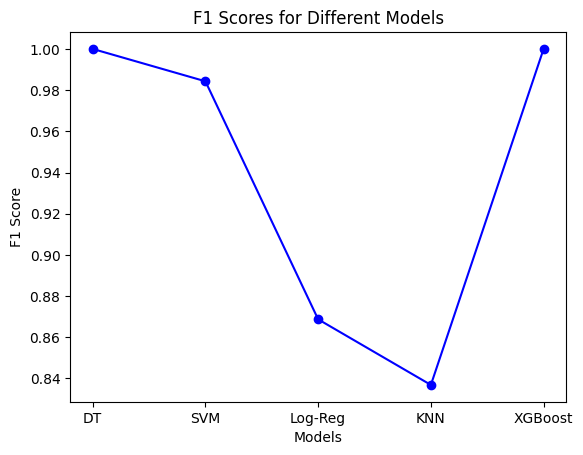

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Load dataset
dataset = pd.read_csv('/content/gdrive/My Drive/Water/korattur-original.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models and get precision scores
models = [
    BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, random_state=42),
    BaggingClassifier(SVC(kernel='linear'), n_estimators=10, random_state=42),
    AdaBoostClassifier(LogisticRegression(random_state=42), n_estimators=10, random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    xgb.XGBClassifier(objective='multi:softmax', num_class=5, max_depth=5, learning_rate=0.1,
                      subsample=0.8, colsample_bytree=0.8, seed=42)
]

model_names = [
    'DT',
    'SVM',
    'Log-Reg',
    'KNN',
    'XGBoost'
]

from sklearn.metrics import f1_score

f1_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

# Plot line chart
plt.plot(model_names, f1_scores, color='blue', marker='o')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models')
plt.show()
